<a href="https://colab.research.google.com/github/MbuviM/Sentiment-Analysis-on-Disconnect-the-Movie/blob/main/Disconnect2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install transformers wordcloud matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 22.3 MB/s eta 0:00:00


In [20]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import tweepy
import pandas as pd
import requests as re
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt


# Obtain API Keys


In [2]:
#@title Default title text
API_Key = 'TNu4URTzZc6MsKAdnZlVujTsi'
KeySecret = 'JYz2i2ZuOQSENsp7kdKg2M3z5EKCNue0528pEumy8IlqUXnKdm'
Access_Token = '1295765346289360896-ANHfqtVeAzLqx1ar3xGqOHMOkWdVYQ'
Access_Token_Secret = 'pGVKiwgVAWVjfa3ilVZc4B04WsSBfMucg7lq6Wdy89kEB'

# Access the Needed API

In [3]:
Auth = tweepy.OAuthHandler(API_Key, KeySecret)
Auth.set_access_token(Access_Token, Access_Token_Secret)
Api = tweepy.API(Auth)


# API Request

In [5]:
keywords = "#Disconnect2"
search_query = keywords + " -filter:retweets AND -filter:replies"

In [16]:
Disconnect_Movie = [] 

def get_tweets(search_query, limit):
    tweets = tweepy.Cursor (Api.search, q=search_query, count = 100, lang = 'en', tweet_mode= 'extended').items(limit)
    for tweet in tweets:
        Disconnect_Movie.append([tweet.id, 
        tweet.user.screen_name, 
        tweet.full_text,        
        tweet.favorite_count,  
        tweet.retweet_count,    
        tweet.user.location,   
        tweet.created_at])    
        #print(tweet)
        
get_tweets(search_query, 1000)  

#Assign names to each column and print the df
Rating_tweets = pd.DataFrame(Disconnect_Movie, columns = ['User_Id','Username', 'Tweet', 'No. of Likes', 'No. of Retweets', 'Location', 'Date'])
print(Rating_tweets)

                User_Id        Username  \
0   1615077388198576133   nyakwarayatta   
1   1614993707991994369    Kendi_Nkonge   
2   1614974749876133889     AngelaMombi   
3   1614950344609382402        WanjiraL   
4   1614910058407817217      spelandria   
5   1614908199479709696      spelandria   
6   1614907492332634113      spelandria   
7   1614907336593707010      spelandria   
8   1614691445062991874  poghie_esquire   
9   1614669125569110023     KisangJanet   
10  1614540761470574595     NgeiMuthoni   
11  1614527229182058496          ohmus3   
12  1614416860891516929     veecupcakey   
13  1614386126730428418        Altuena9   
14  1614373794965069830       reneegeeh   
15  1614370036495388673        snaccato   
16  1614369628884459522  WangariKamanga   
17  1614341981450440704     gutter_rat2   
18  1614326488853250048    Fishwear2020   
19  1614325716530900992      ms_mukundi   
20  1614304929438437377       cherono_s   
21  1614258351445274626          wamb_z   
22  1614246

# Sentiment Analysis using TextBlob



In [38]:
def get_sentiment(tweet):
    blob = TextBlob(tweet)
    return blob.sentiment

#Tuple that contains the polarity and subjectivity
#where polarity is a float within the range [-1, 1] indicating the sentiment of the text (-1 is negative, 0 is neutral, and 1 is positive) 
#and subjectivity is a float within the range [0, 1] indicating the subjectivity of the text (0 is objective and 1 is subjective).
Rating_tweets['sentiment'] = Rating_tweets['Tweet'].apply(get_sentiment) 
Rating_tweets

,User_Id,Username,Tweet,No. of Likes,No. of Retweets,Location,Date,sentiment
0,1615077388198576133,nyakwarayatta,I'd say @kate_Actress_ role on #Disconnect2 ov...,0,0,,2023-01-16 20:03:50,"(-0.00833333333333334, 0.5916666666666667)"
1,1614993707991994369,Kendi_Nkonge,I would like to know who the screenwriter in #...,0,0,"Nairobi, Kenya",2023-01-16 14:31:19,"(0.8, 0.75)"
2,1614974749876133889,AngelaMombi,Lmao #Disconnect2 has some hilarious lines. P...,2,0,France,2023-01-16 13:15:59,"(0.6, 0.8666666666666667)"
3,1614950344609382402,WanjiraL,I’m as earnest and pro love as she is. 🥹🫂💝 #Di...,2,0,"Nairobi, Kenya",2023-01-16 11:39:01,"(0.5, 0.6)"
4,1614910058407817217,spelandria,NOT THE KIKUYU AND IGBO BANTER PLEASE!! Like W...,0,0,Blk/female,2023-01-16 08:58:56,"(-0.2, 0.8)"
5,1614908199479709696,spelandria,This movie makes me miss kenya more. This is b...,1,0,Blk/female,2023-01-16 08:51:32,"(-0.09999999999999992, 0.5833333333333333)"
6,1614907492332634113,spelandria,Not when tk finds her she is like karibu bitch...,0,0,Blk/female,2023-01-16 08:48:44,"(-0.5, 0.9)"
7,1614907336593707010,spelandria,CELINE A BITCH BUT I WOULDNT DO THAT TO MY FRI...,0,0,Blk/female,2023-01-16 08:48:07,"(-0.2, 0.4)"
8,1614691445062991874,poghie_esquire,If you do nothing else this Sunday evening ple...,8,2,"Nairobi,Kenya",2023-01-15 18:30:14,"(0.0, 0.0)"
9,1614669125569110023,KisangJanet,That rooster crowing gave me PTSD. #Disconnect2,1,0,,2023-01-15 17:01:33,"(0.0, 0.0)"


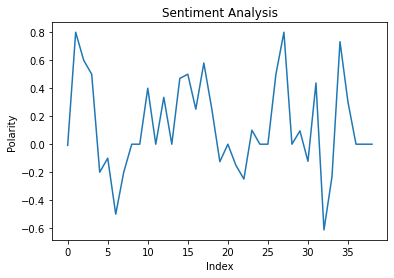

In [36]:
sentiment_scores = [s[0] for s in Rating_tweets['sentiment']]

plt.plot(sentiment_scores)
plt.xlabel('Index')
plt.ylabel('Polarity')
plt.title('Sentiment Analysis')
plt.show()